#                              Data Pre-processing and EDA

## More info about columns


session_id - unique identifier for the session that this row is a part of

session_position {1-20} - position of row within session

session_length {10-20} - number of rows in session

track_id_clean - unique identifier for the track played. This is linked with track_id in the track features and metadata table.

skip_1 - Boolean indicating if the track was only played very briefly

skip_2 - Boolean indicating if the track was only played briefly

skip_3 - Boolean indicating if most of the track was played

not_skipped Boolean indicating that the track was played in its entirety

context_switch - Boolean indicating if the user changed context between the previous row and the current row. This could for example occur if the user switched from one playlist to another.

no_pause_before_play - Boolean indicating if there was no pause between playback of the previous track and this track

short_pause_before_play - Boolean indicating if there was a short pause between playback of the previous track and this track

long_pause_before_play - Boolean indicating if there was a long pause between playback of the previous track and this track

hist_user_behavior_n_seekfwd - Number of times the user did a seek forward within track

hist_user_behavior_n_seekback - Number of times the user did a seek back within track

hist_user_behavior_is_shuffle - Boolean indicating if the user encountered this track while shuffle mode was activated

hour_of_day {0-23} - The hour of day

date - E.g. 2018-09-18 - The date

premium - Boolean indicating if the user was on premium or not. This has potential implications for skipping behavior.

context_type - E.g. editorial playlist - what type of context the playback occurred within

hist_user_behavior_reason_start - E.g. fwdbtn - the user action which led to the current track being played

hist_user_behavior_reason_end - E.g. trackdone - the user action which led to the current track playback ending

## Importing Relevant Libraries

In [1]:
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
#from sklearn.model_selection import RepeatedStratifiedKFold


## Reading the Train Dataset

In [2]:
#reading the train datset and viewing it
spotify_train = pd.read_csv("Spotify training set.csv")
spotify_train

C:\Users\GANESH\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (3,4,5,6,7,14,16,17,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,session_id,session_position,session_length,track_id_clean,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,...,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1.0,20.0,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,False,True,0.0,0.0,...,0.0,0.0,0.0,True,16.0,7/15/2018,True,editorial_playlist,trackdone,trackdone
1,0_00006f66-33e5-4de7-a324-2d18e439fc1e,2.0,20.0,t_9099cd7b-c238-47b7-9381-f23f2c1d1043,False,False,False,True,0.0,1.0,...,0.0,0.0,0.0,True,16.0,7/15/2018,True,editorial_playlist,trackdone,trackdone
2,0_00006f66-33e5-4de7-a324-2d18e439fc1e,3.0,20.0,t_fc5df5ba-5396-49a7-8b29-35d0d28249e0,False,False,False,True,0.0,1.0,...,0.0,0.0,0.0,True,16.0,7/15/2018,True,editorial_playlist,trackdone,trackdone
3,0_00006f66-33e5-4de7-a324-2d18e439fc1e,4.0,20.0,t_23cff8d6-d874-4b20-83dc-94e450e8aa20,False,False,False,True,0.0,1.0,...,0.0,0.0,0.0,True,16.0,7/15/2018,True,editorial_playlist,trackdone,trackdone
4,0_00006f66-33e5-4de7-a324-2d18e439fc1e,5.0,20.0,t_64f3743c-f624-46bb-a579-0f3f9a07a123,False,False,False,True,0.0,1.0,...,0.0,0.0,0.0,True,16.0,7/15/2018,True,editorial_playlist,trackdone,trackdone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
218582,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
218583,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
218584,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
spotify_train.head()

,session_id,session_position,session_length,track_id_clean,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,...,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1.0,20.0,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,False,True,0.0,0.0,...,0.0,0.0,0.0,True,16.0,7/15/2018,True,editorial_playlist,trackdone,trackdone
1,0_00006f66-33e5-4de7-a324-2d18e439fc1e,2.0,20.0,t_9099cd7b-c238-47b7-9381-f23f2c1d1043,False,False,False,True,0.0,1.0,...,0.0,0.0,0.0,True,16.0,7/15/2018,True,editorial_playlist,trackdone,trackdone
2,0_00006f66-33e5-4de7-a324-2d18e439fc1e,3.0,20.0,t_fc5df5ba-5396-49a7-8b29-35d0d28249e0,False,False,False,True,0.0,1.0,...,0.0,0.0,0.0,True,16.0,7/15/2018,True,editorial_playlist,trackdone,trackdone
3,0_00006f66-33e5-4de7-a324-2d18e439fc1e,4.0,20.0,t_23cff8d6-d874-4b20-83dc-94e450e8aa20,False,False,False,True,0.0,1.0,...,0.0,0.0,0.0,True,16.0,7/15/2018,True,editorial_playlist,trackdone,trackdone
4,0_00006f66-33e5-4de7-a324-2d18e439fc1e,5.0,20.0,t_64f3743c-f624-46bb-a579-0f3f9a07a123,False,False,False,True,0.0,1.0,...,0.0,0.0,0.0,True,16.0,7/15/2018,True,editorial_playlist,trackdone,trackdone


In [4]:
spotify_train.tail()

,session_id,session_position,session_length,track_id_clean,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,...,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end
218581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
218582,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
218583,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
218584,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
218585,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
spotify_train.shape

(218586, 21)

In [6]:
spotify_train.dtypes

session_id                          object
session_position                   float64
session_length                     float64
track_id_clean                      object
skip_1                              object
skip_2                              object
skip_3                              object
not_skipped                         object
context_switch                     float64
no_pause_before_play               float64
short_pause_before_play            float64
long_pause_before_play             float64
hist_user_behavior_n_seekfwd       float64
hist_user_behavior_n_seekback      float64
hist_user_behavior_is_shuffle       object
hour_of_day                        float64
date                                object
premium                             object
context_type                        object
hist_user_behavior_reason_start     object
hist_user_behavior_reason_end       object
dtype: object

In [7]:
spotify_train.columns

Index(['session_id', 'session_position', 'session_length', 'track_id_clean',
       'skip_1', 'skip_2', 'skip_3', 'not_skipped', 'context_switch',
       'no_pause_before_play', 'short_pause_before_play',
       'long_pause_before_play', 'hist_user_behavior_n_seekfwd',
       'hist_user_behavior_n_seekback', 'hist_user_behavior_is_shuffle',
       'hour_of_day', 'date', 'premium', 'context_type',
       'hist_user_behavior_reason_start', 'hist_user_behavior_reason_end'],
      dtype='object')

In [8]:
spotify_train.describe()

,session_position,session_length,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hour_of_day
count,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000
mean,9.325911,17.651823,0.040904,0.767602,0.146635,0.172832,0.038909,0.046259,14.193084
std,5.457638,3.422025,0.198069,0.422363,0.353742,0.378103,0.367295,0.606558,5.996243
min,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,15.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,11.000000
50%,9.000000,20.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,15.000000
75%,14.000000,20.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,19.000000
max,20.000000,20.000000,1.000000,1.000000,1.000000,1.000000,60.000000,151.000000,23.000000


In [9]:
# Information of training set
spotify_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218586 entries, 0 to 218585
Data columns (total 21 columns):
session_id                         167881 non-null object
session_position                   167880 non-null float64
session_length                     167880 non-null float64
track_id_clean                     167880 non-null object
skip_1                             167880 non-null object
skip_2                             167880 non-null object
skip_3                             167880 non-null object
not_skipped                        167880 non-null object
context_switch                     167880 non-null float64
no_pause_before_play               167880 non-null float64
short_pause_before_play            167880 non-null float64
long_pause_before_play             167880 non-null float64
hist_user_behavior_n_seekfwd       167880 non-null float64
hist_user_behavior_n_seekback      167880 non-null float64
hist_user_behavior_is_shuffle      167880 non-null object
hour_of_day

## Feature Engineering and Data Wrangling

In [13]:
#Checking for NAN rows
spotify_train.isnull().sum()

session_id                         50705
session_position                   50706
session_length                     50706
track_id_clean                     50706
skip_1                             50706
skip_2                             50706
skip_3                             50706
not_skipped                        50706
context_switch                     50706
no_pause_before_play               50706
short_pause_before_play            50706
long_pause_before_play             50706
hist_user_behavior_n_seekfwd       50706
hist_user_behavior_n_seekback      50706
hist_user_behavior_is_shuffle      50706
hour_of_day                        50706
date                               50706
premium                            50706
context_type                       50706
hist_user_behavior_reason_start    50706
hist_user_behavior_reason_end      50706
dtype: int64

In [14]:
#dropping NAN Values because 50706 NAN values are present in the bottom rows of all the features
spotify_train.dropna(inplace=True)

In [15]:
# Imputing Binary columns with 1 and 0
spotify_train['skip_1'] = [1 if x =='True' else 0 for x in spotify_train['skip_1']]
spotify_train['skip_2'] = [1 if x =='True' else 0 for x in spotify_train['skip_1']]
spotify_train['skip_3'] = [1 if x =='True' else 0 for x in spotify_train['skip_1']]
spotify_train['premium'] = [1 if x =='True' else 0 for x in spotify_train['premium']]
spotify_train['hist_user_behavior_is_shuffle'] = [1 if x =='True' else 0 for x in spotify_train['hist_user_behavior_is_shuffle']]

In [16]:
#making a new column to check if user uses seek bar while listening to songs 
conditions = [
    (spotify_train['hist_user_behavior_n_seekfwd'] > 0) & (spotify_train['hist_user_behavior_n_seekback'] >0),
    (spotify_train['hist_user_behavior_n_seekfwd'] == 0) & (spotify_train['hist_user_behavior_n_seekback'] ==0),
    ]
values = [1,0]
spotify_train["hist_user_seek_behavior"]=np.select(conditions, values)


In [17]:
#making a new column to identify the day time in a categorical format
conditions = [
    (spotify_train['hour_of_day'] >= 0) & (spotify_train['hour_of_day'] <=5),
    (spotify_train['hour_of_day'] > 5) & (spotify_train['hour_of_day'] <= 6),
    (spotify_train['hour_of_day'] > 6) & (spotify_train['hour_of_day'] <= 9),
    (spotify_train['hour_of_day'] > 9) & (spotify_train['hour_of_day'] <=12),
    (spotify_train['hour_of_day'] > 12) & (spotify_train['hour_of_day'] <=14),
    (spotify_train['hour_of_day'] > 14) & (spotify_train['hour_of_day'] <=17),
    (spotify_train['hour_of_day'] > 17) & (spotify_train['hour_of_day'] <=21),
    (spotify_train['hour_of_day'] > 21),
    ]

In [18]:
# create a list of the values we want to assign for each condition
values = ['dawn', 'early_morning', 'morning', 'mid_morning','noon','afternoon','evening','night']

In [19]:
# create a new column and use np.select to assign values to it using our lists as arguments
spotify_train['time_of_day'] = np.select(conditions, values)

### Binary Encoding

In [20]:
#Binary Encoding for the categorical columns
#!pip install category_encoders
import category_encoders as ce

dummy=spotify_train[["time_of_day","hist_user_behavior_reason_end","hist_user_behavior_reason_start","context_type"]]
encoder=ce.BinaryEncoder(cols=dummy.columns,return_df=True)
dummy_encoded=encoder.fit_transform(dummy) 
train=pd.concat([spotify_train.drop(["time_of_day","hist_user_behavior_reason_end","hist_user_behavior_reason_start","context_type"],axis=1) ,dummy_encoded],axis=1)

In [21]:
# Information of training set
spotify_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167880 entries, 0 to 167879
Data columns (total 23 columns):
session_id                         167880 non-null object
session_position                   167880 non-null float64
session_length                     167880 non-null float64
track_id_clean                     167880 non-null object
skip_1                             167880 non-null int64
skip_2                             167880 non-null int64
skip_3                             167880 non-null int64
not_skipped                        167880 non-null object
context_switch                     167880 non-null float64
no_pause_before_play               167880 non-null float64
short_pause_before_play            167880 non-null float64
long_pause_before_play             167880 non-null float64
hist_user_behavior_n_seekfwd       167880 non-null float64
hist_user_behavior_n_seekback      167880 non-null float64
hist_user_behavior_is_shuffle      167880 non-null int64
hour_of_day    

In [22]:
# summary for objects columns
spotify_train.describe(include=['O'])

,session_id,track_id_clean,not_skipped,date,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end,time_of_day
count,167880,167880,167880,167880,167880,167880,167880,167880
unique,10000,50704,2,18,6,9,7,8
top,0_04d0c5a3-4f28-4129-bdf0-51cfcd1f9ac4,t_bacf06d3-9185-4183-84ea-ff0db51475ce,False,7/15/2018,user_collection,fwdbtn,fwdbtn,evening
freq,20,1427,111996,119639,67430,79912,81389,39090


In [23]:
# droping duplicates and null values : 
spotify_train.drop_duplicates(inplace=True)
spotify_train.dropna(inplace=True)
spotify_train.shape

(167880, 23)

In [24]:
# changing the type of columns 
for colname in ['skip_1','skip_2','skip_3','not_skipped','hist_user_behavior_is_shuffle','premium']:
    spotify_train[colname] = spotify_train[colname].astype(int, copy=False)

In [25]:
#Creating a Skipped column for making prediction by reversing the not_skipped columns
spotify_train["Skipped"]=spotify_train["not_skipped"].replace({0:1, 1:0})

In [26]:
spotify_train['Skipped'].value_counts()

1    111996
0     55884
Name: Skipped, dtype: int64

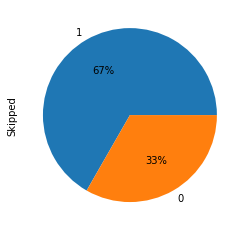

In [27]:
spotify_train['Skipped'].value_counts().plot(kind='pie', autopct = "%1.0f%%")

In [28]:
# creating copy of the train data 
df = spotify_train.copy()
df.shape

(167880, 24)

### Dropping Irrelevent columns

In [29]:

#dropping the irrelevant columns
#spotify_train=spotify_train.drop(["skip_1","skip_2","skip_3","not_skipped","session_id","short_pause_before_play","long_pause_before_play","hour_of_day","date"],axis=1)
df = df.drop(columns=['skip_1','skip_2','skip_3','not_skipped','date'])
df.shape

(167880, 19)

In [30]:
df.head()

,session_id,session_position,session_length,track_id_clean,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end,hist_user_seek_behavior,time_of_day,Skipped
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1.0,20.0,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,0.0,0.0,0.0,0.0,0.0,0.0,0,16.0,0,editorial_playlist,trackdone,trackdone,0,afternoon,0
1,0_00006f66-33e5-4de7-a324-2d18e439fc1e,2.0,20.0,t_9099cd7b-c238-47b7-9381-f23f2c1d1043,0.0,1.0,0.0,0.0,0.0,0.0,0,16.0,0,editorial_playlist,trackdone,trackdone,0,afternoon,0
2,0_00006f66-33e5-4de7-a324-2d18e439fc1e,3.0,20.0,t_fc5df5ba-5396-49a7-8b29-35d0d28249e0,0.0,1.0,0.0,0.0,0.0,0.0,0,16.0,0,editorial_playlist,trackdone,trackdone,0,afternoon,0
3,0_00006f66-33e5-4de7-a324-2d18e439fc1e,4.0,20.0,t_23cff8d6-d874-4b20-83dc-94e450e8aa20,0.0,1.0,0.0,0.0,0.0,0.0,0,16.0,0,editorial_playlist,trackdone,trackdone,0,afternoon,0
4,0_00006f66-33e5-4de7-a324-2d18e439fc1e,5.0,20.0,t_64f3743c-f624-46bb-a579-0f3f9a07a123,0.0,1.0,0.0,0.0,0.0,0.0,0,16.0,0,editorial_playlist,trackdone,trackdone,0,afternoon,0


One-hot Encoding on Train data

In [31]:
df1 = df.drop(['session_id', 'track_id_clean'], axis=1)
df1.shape

(167880, 17)

In [32]:
dummy_train = pd.get_dummies(df1)
dummy_train.shape

(167880, 43)

In [33]:
dummy_train.head()

,session_position,session_length,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,...,hist_user_behavior_reason_end_remote,hist_user_behavior_reason_end_trackdone,time_of_day_afternoon,time_of_day_dawn,time_of_day_early_morning,time_of_day_evening,time_of_day_mid_morning,time_of_day_morning,time_of_day_night,time_of_day_noon
0,1.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0,16.0,...,0,1,1,0,0,0,0,0,0,0
1,2.0,20.0,0.0,1.0,0.0,0.0,0.0,0.0,0,16.0,...,0,1,1,0,0,0,0,0,0,0
2,3.0,20.0,0.0,1.0,0.0,0.0,0.0,0.0,0,16.0,...,0,1,1,0,0,0,0,0,0,0
3,4.0,20.0,0.0,1.0,0.0,0.0,0.0,0.0,0,16.0,...,0,1,1,0,0,0,0,0,0,0
4,5.0,20.0,0.0,1.0,0.0,0.0,0.0,0.0,0,16.0,...,0,1,1,0,0,0,0,0,0,0


### Analysing categorical data

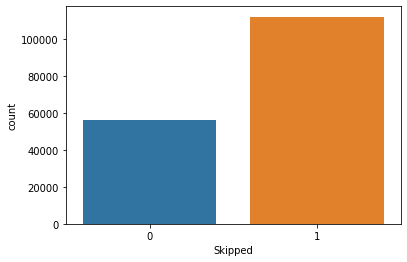

In [34]:
sns.countplot(x="Skipped",data=spotify_train[['Skipped']])

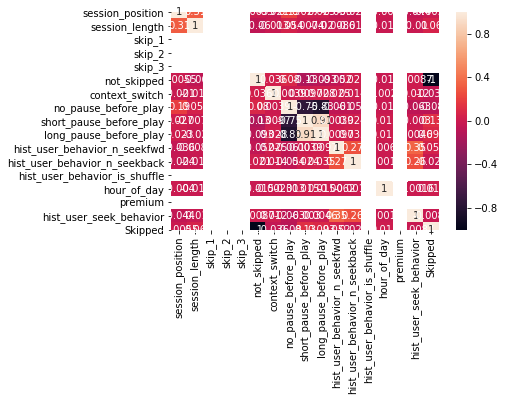

In [35]:
# Correlation matrix completely ignores any non-numeric column. 
sns.heatmap(spotify_train.corr(), annot=True)     #Checking for correlation between various features
plt.show()

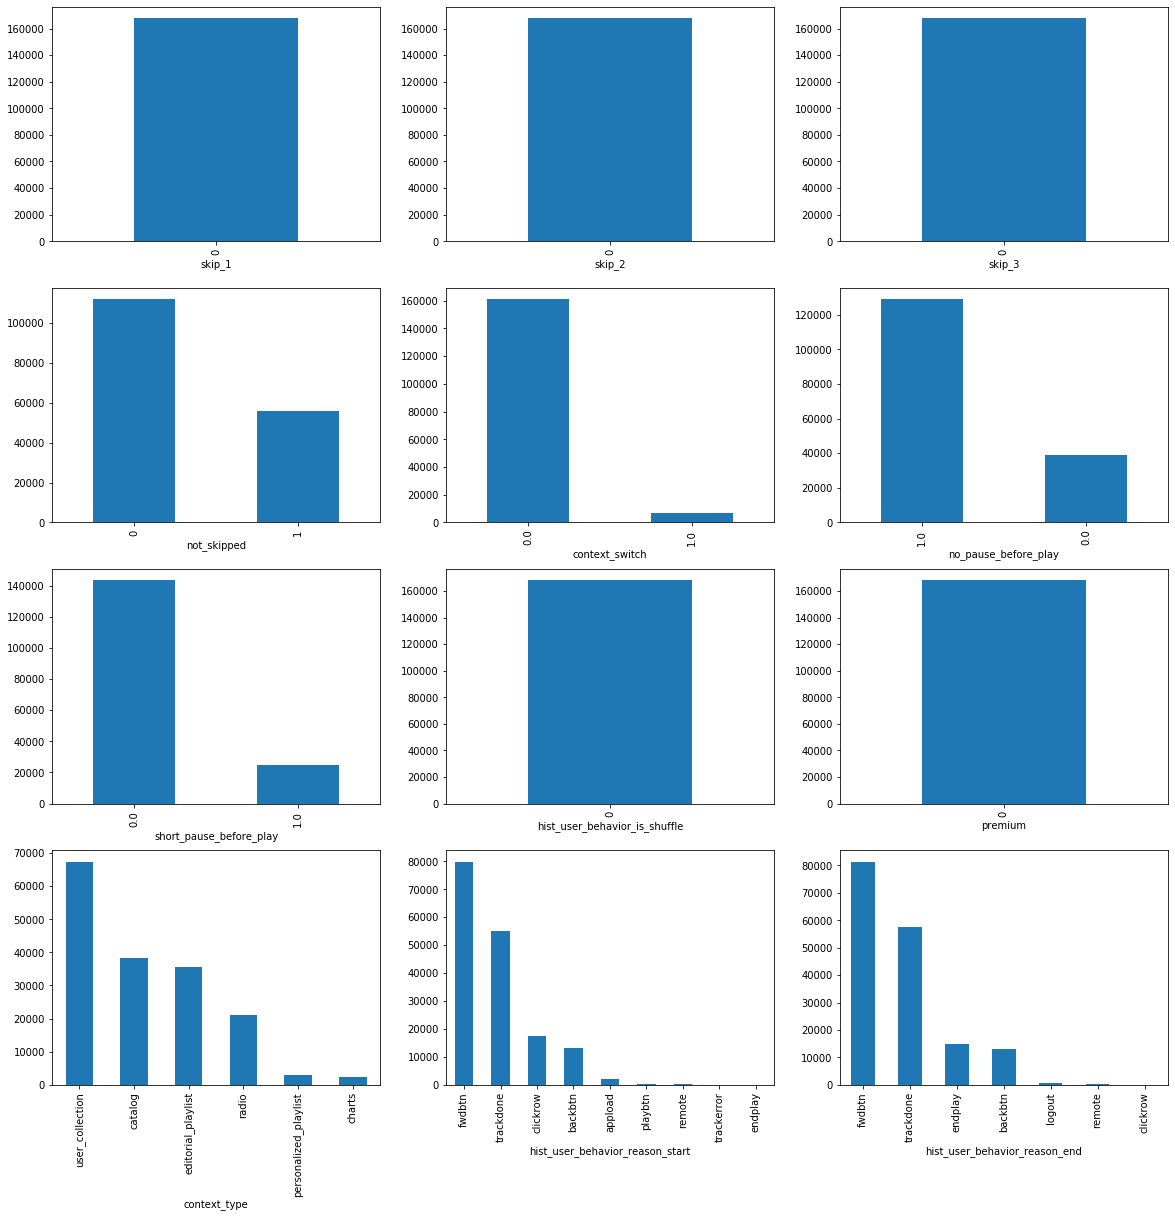

In [36]:
col = ['skip_1','skip_2','skip_3','not_skipped','context_switch','no_pause_before_play','short_pause_before_play','hist_user_behavior_is_shuffle',
       'premium','context_type','hist_user_behavior_reason_start','hist_user_behavior_reason_end']

plt.figure(figsize=(20,25))
n = 1
for colname in col:
    plt.subplot(5,3,n)
    spotify_train[colname].value_counts().plot(kind='bar')
    plt.xlabel(colname)
    n +=1

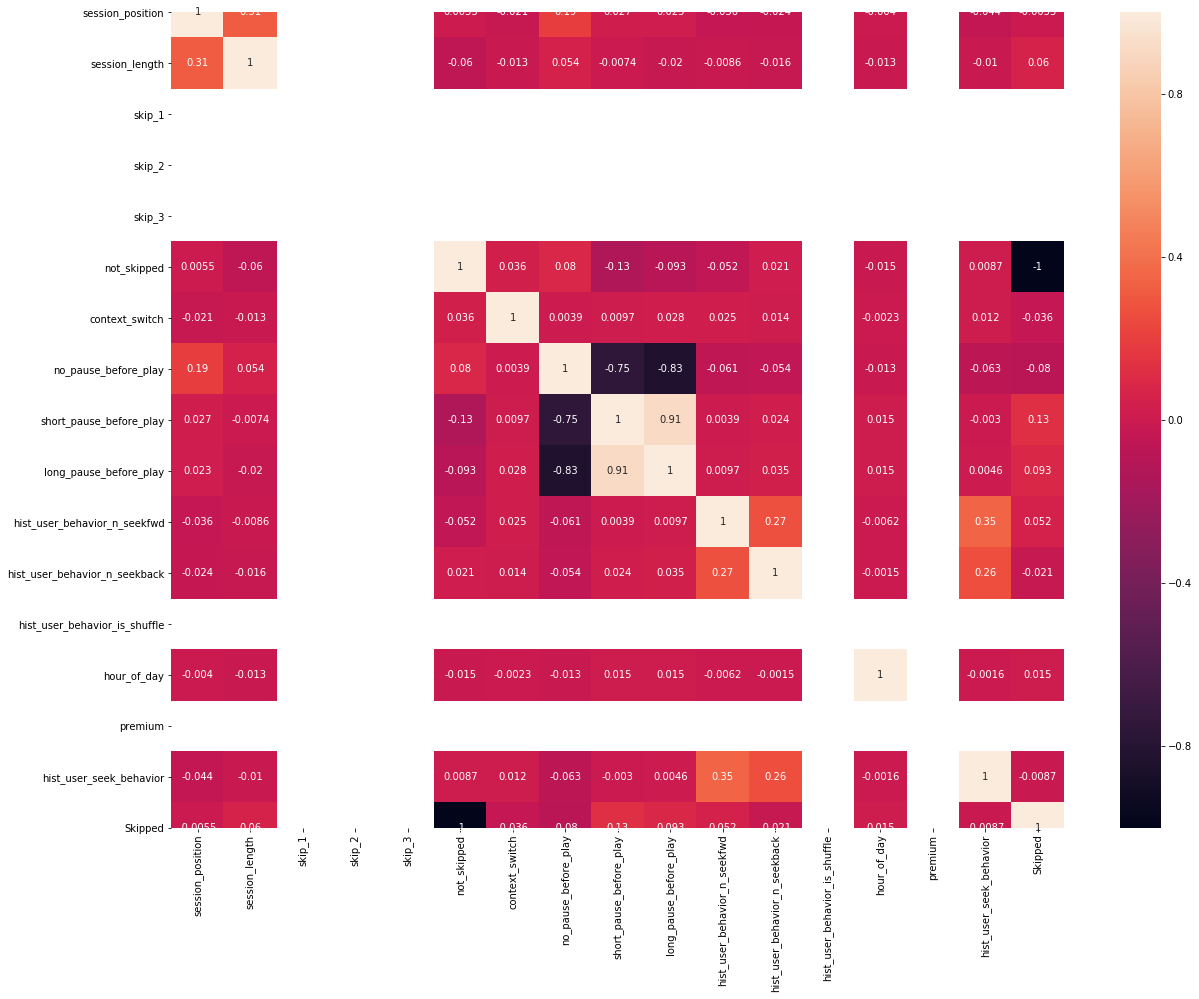

In [37]:
plt.figure(figsize=(20,15))
sns.heatmap(spotify_train.corr(), annot=True);

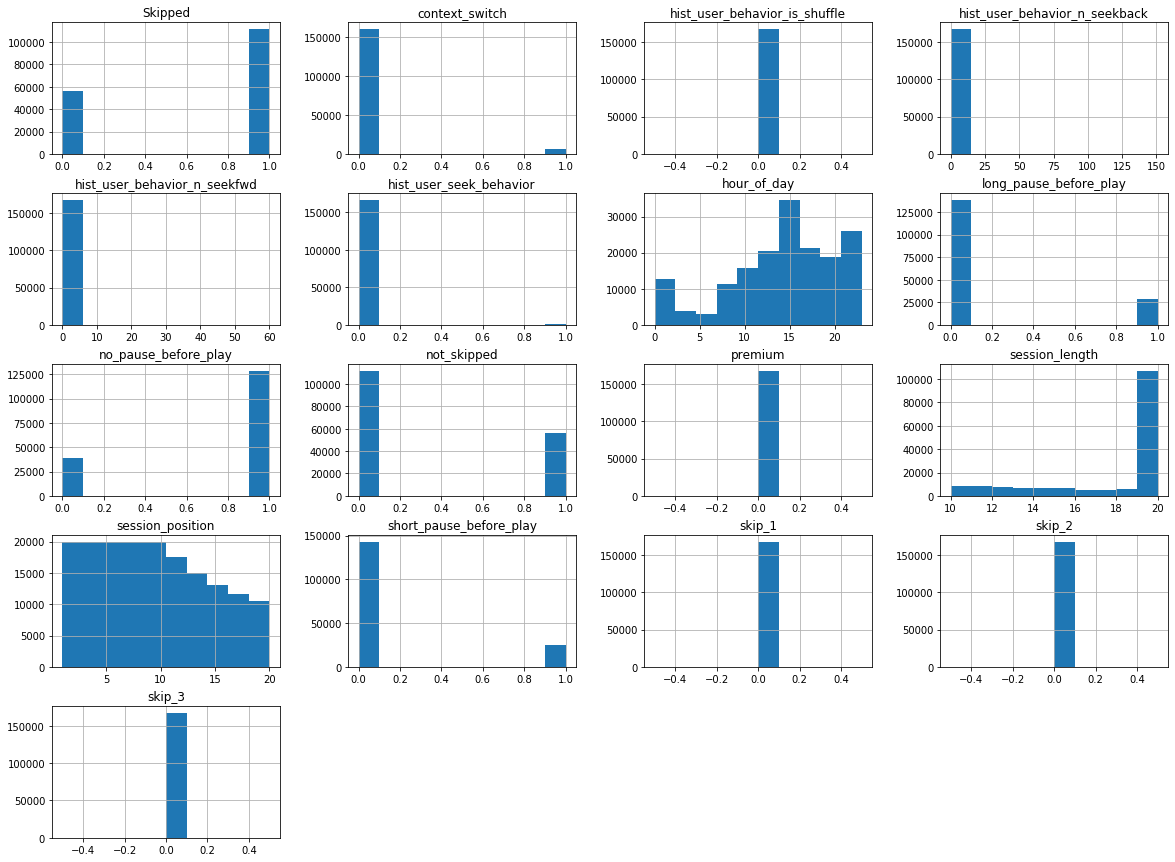

In [38]:
spotify_train.hist(figsize=(20,15));

## Importing track_feats dataset

In [39]:
t=pd.read_csv('track_feats.csv')
t.head()

,track_id,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,...,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
0,t_7f435320-5d3b-497d-9346-0c97429af2b9,3.866097,0.441176,-0.403765,0.075846,0.499848,0.494943,0.461215,-0.208611,0.563252,...,0.571429,0.468440,1.034540,-1.040880,-1.281460,-0.375163,1.442307,0.045940,-0.443245,-0.243705
1,t_2a7b6393-ebec-4e1f-a53f-2ad842532c99,1.512969,0.308824,0.314153,0.085482,0.450139,0.457034,0.663219,-0.305010,0.767307,...,0.571429,0.655369,0.834594,-0.653568,-0.483168,-0.538935,1.247153,0.414248,-0.468285,-0.931875
2,t_949441c4-4920-4eed-b929-2d67d37b7bd9,-1.332280,0.485294,0.001032,0.002274,0.243778,0.229295,0.290262,-1.181899,0.958647,...,0.571429,0.293100,0.846650,0.123691,-2.692681,-0.770798,1.533066,-0.173705,-0.402540,1.181761
3,t_63eae5ac-744a-46ee-b719-0db8e70d6f7f,-0.712162,0.485294,0.558944,0.005024,0.338580,0.331703,0.348846,-0.795663,0.886674,...,0.571429,0.387131,0.920349,0.335177,-2.631787,-1.033223,1.549514,-0.036511,-0.488062,1.028883
4,t_a0747d21-6042-4af7-a21d-aa7cd1a8094e,-1.629474,0.573529,-0.356946,0.962717,0.130125,0.092335,0.170027,-2.024206,0.005674,...,0.428571,0.030858,2.238796,-3.259609,-2.378984,1.288895,-1.053248,-3.132837,0.946820,-0.623612


In [40]:
t.shape

(316702, 30)

In [41]:
t.tail()

,track_id,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,...,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
316697,t_d83f9f08-c97c-4016-9a50-b954b690067c,-0.338709,1.0,0.665809,0.015659,0.583170,0.565491,0.739756,0.010257,0.734084,...,0.571429,0.489606,-0.282396,0.836088,0.879664,-0.570508,-1.374668,1.060288,0.902784,1.188963
316698,t_18374f42-775a-4b30-8290-5fdbae4abf66,0.595034,1.0,-2.083274,0.009085,0.557751,0.611746,0.675760,0.496123,0.486148,...,0.571429,0.128541,-1.326573,0.522085,0.511331,0.249874,-0.700613,-0.101871,-0.998303,0.503463
316699,t_3744e6a6-fa2f-4d3f-a29f-0c43b17762d7,-0.390532,1.0,0.677950,0.153849,0.518964,0.577224,0.698178,0.354531,0.587263,...,0.571429,0.214664,-1.166396,0.483569,0.374550,0.087464,-0.620181,-0.087409,-1.220365,0.369372
316700,t_c1fbc23f-e577-4ea6-95e6-0f2f99013934,-0.513326,1.0,0.689408,0.081950,0.620092,0.654756,0.819703,0.622234,0.629792,...,0.571429,0.953289,-0.608497,1.024093,1.122209,-0.110121,-0.934610,0.642496,0.162871,-0.151821
316701,t_2032661c-7b8a-4ac7-aba8-147778f073b6,-0.278552,1.0,0.672359,0.171612,0.466277,0.479513,0.666329,-0.199651,0.938241,...,0.571429,0.614840,-0.545387,1.277890,0.608589,-0.605832,-0.771592,0.728147,-0.025310,0.326801


In [42]:
t.sample(5)

,track_id,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,...,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
222840,t_713c0c9b-ba18-46fd-87e9-6515c2f7cd88,0.629159,0.985294,0.669021,0.213483,0.379503,0.351832,0.490995,-0.805658,0.813416,...,0.571429,0.554362,0.633391,-0.079136,-0.797125,-1.328376,0.109061,0.978563,-0.788652,-0.063168
151922,t_12925c82-53b0-42d7-8500-f3031d389293,1.461230,0.955882,0.267031,0.518642,0.276483,0.238418,0.439236,-1.256505,0.864006,...,0.571429,0.392860,0.063120,-0.791883,-0.468066,0.336785,-0.653529,-0.393747,-0.112289,0.605677
172409,t_e035c812-d949-4d0d-9bea-59c244d83dbc,-0.702715,0.985294,0.678545,0.951439,0.080507,0.056927,0.153496,-2.140674,0.328965,...,0.714286,0.010340,1.625072,-1.470102,-2.496335,0.131441,-0.739022,-1.394575,0.423291,0.929951
296754,t_00445ba5-6c09-4dbd-ae7a-3e0161a2453b,0.144572,0.897059,-4.178816,0.027253,0.452636,0.536428,0.495759,0.262040,0.822934,...,0.571429,0.158495,-1.117360,0.386907,-0.008210,0.344146,-0.615641,-0.596298,-0.795281,0.320971
86968,t_d254fa44-fafe-4b9c-b130-01b6c0650d5d,-0.461632,0.985294,0.383792,0.956270,0.634110,0.682371,0.770698,0.827349,0.162802,...,0.571429,0.639833,0.177568,-0.407107,0.071666,-0.316773,-0.609626,0.622779,-0.230488,0.281211


In [43]:
gk = df.groupby("track_id_clean")

In [44]:
df.describe(include="all")

,session_id,session_position,session_length,track_id_clean,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end,hist_user_seek_behavior,time_of_day,Skipped
count,167880,167880.000000,167880.000000,167880,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.0,167880.000000,167880.0,167880,167880,167880,167880.000000,167880,167880.000000
unique,10000,NaN,NaN,50704,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,9,7,NaN,8,NaN
top,0_04d0c5a3-4f28-4129-bdf0-51cfcd1f9ac4,NaN,NaN,t_bacf06d3-9185-4183-84ea-ff0db51475ce,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,user_collection,fwdbtn,fwdbtn,NaN,evening,NaN
freq,20,NaN,NaN,1427,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67430,79912,81389,NaN,39090,NaN
mean,NaN,9.325911,17.651823,NaN,0.040904,0.767602,0.146635,0.172832,0.038909,0.046259,0.0,14.193084,0.0,NaN,NaN,NaN,0.004718,NaN,0.667119
std,NaN,5.457638,3.422025,NaN,0.198069,0.422363,0.353742,0.378103,0.367295,0.606558,0.0,5.996243,0.0,NaN,NaN,NaN,0.068523,NaN,0.471246
min,NaN,1.000000,10.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,NaN,NaN,NaN,0.000000,NaN,0.000000
25%,NaN,5.000000,15.000000,NaN,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,11.000000,0.0,NaN,NaN,NaN,0.000000,NaN,0.000000
50%,NaN,9.000000,20.000000,NaN,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,15.000000,0.0,NaN,NaN,NaN,0.000000,NaN,1.000000
75%,NaN,14.000000,20.000000,NaN,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,19.000000,0.0,NaN,NaN,NaN,0.000000,NaN,1.000000


In [45]:
df.track_id_clean.unique

<bound method Series.unique of 0         t_0479f24c-27d2-46d6-a00c-7ec928f2b539
1         t_9099cd7b-c238-47b7-9381-f23f2c1d1043
2         t_fc5df5ba-5396-49a7-8b29-35d0d28249e0
3         t_23cff8d6-d874-4b20-83dc-94e450e8aa20
4         t_64f3743c-f624-46bb-a579-0f3f9a07a123
                           ...                  
167875    t_360910e8-2a84-42b0-baf1-59abcf96a1f2
167876    t_aa2fff77-9b0a-4fa3-a685-ecef50310e8a
167877    t_f673e1b7-4ebe-4fc1-ac24-a9f25de70381
167878    t_e172e8e7-7161-42a9-acb0-d606346c8f87
167879    t_77977dd6-597e-4425-8f8f-4efb32ecfba6
Name: track_id_clean, Length: 167880, dtype: object>

In [46]:
df["track_id"] = df["track_id_clean"]

In [47]:
df = df.drop("track_id_clean", axis=1)

In [48]:
df.columns

Index(['session_id', 'session_position', 'session_length', 'context_switch',
       'no_pause_before_play', 'short_pause_before_play',
       'long_pause_before_play', 'hist_user_behavior_n_seekfwd',
       'hist_user_behavior_n_seekback', 'hist_user_behavior_is_shuffle',
       'hour_of_day', 'premium', 'context_type',
       'hist_user_behavior_reason_start', 'hist_user_behavior_reason_end',
       'hist_user_seek_behavior', 'time_of_day', 'Skipped', 'track_id'],
      dtype='object')

In [49]:
df.head()

,session_id,session_position,session_length,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end,hist_user_seek_behavior,time_of_day,Skipped,track_id
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0,16.0,0,editorial_playlist,trackdone,trackdone,0,afternoon,0,t_0479f24c-27d2-46d6-a00c-7ec928f2b539
1,0_00006f66-33e5-4de7-a324-2d18e439fc1e,2.0,20.0,0.0,1.0,0.0,0.0,0.0,0.0,0,16.0,0,editorial_playlist,trackdone,trackdone,0,afternoon,0,t_9099cd7b-c238-47b7-9381-f23f2c1d1043
2,0_00006f66-33e5-4de7-a324-2d18e439fc1e,3.0,20.0,0.0,1.0,0.0,0.0,0.0,0.0,0,16.0,0,editorial_playlist,trackdone,trackdone,0,afternoon,0,t_fc5df5ba-5396-49a7-8b29-35d0d28249e0
3,0_00006f66-33e5-4de7-a324-2d18e439fc1e,4.0,20.0,0.0,1.0,0.0,0.0,0.0,0.0,0,16.0,0,editorial_playlist,trackdone,trackdone,0,afternoon,0,t_23cff8d6-d874-4b20-83dc-94e450e8aa20
4,0_00006f66-33e5-4de7-a324-2d18e439fc1e,5.0,20.0,0.0,1.0,0.0,0.0,0.0,0.0,0,16.0,0,editorial_playlist,trackdone,trackdone,0,afternoon,0,t_64f3743c-f624-46bb-a579-0f3f9a07a123


In [50]:
df_list = pd.merge(df, t, on="track_id")

In [51]:
df_list.columns

Index(['session_id', 'session_position', 'session_length', 'context_switch',
       'no_pause_before_play', 'short_pause_before_play',
       'long_pause_before_play', 'hist_user_behavior_n_seekfwd',
       'hist_user_behavior_n_seekback', 'hist_user_behavior_is_shuffle',
       'hour_of_day', 'premium', 'context_type',
       'hist_user_behavior_reason_start', 'hist_user_behavior_reason_end',
       'hist_user_seek_behavior', 'time_of_day', 'Skipped', 'track_id',
       'duration', 'release_year', 'us_popularity_estimate', 'acousticness',
       'beat_strength', 'bounciness', 'danceability', 'dyn_range_mean',
       'energy', 'flatness', 'instrumentalness', 'key', 'liveness', 'loudness',
       'mechanism', 'is_major', 'organism', 'speechiness', 'tempo',
       'time_signature', 'valence', 'acoustic_vector_0', 'acoustic_vector_1',
       'acoustic_vector_2', 'acoustic_vector_3', 'acoustic_vector_4',
       'acoustic_vector_5', 'acoustic_vector_6', 'acoustic_vector_7'],
      dtype='ob

In [52]:
sample = df_list.sample(frac=0.01, random_state=42)
sample.shape

(1544, 48)